<a href="https://colab.research.google.com/github/mahimdashora/Decision-Tree/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas.util.testing as tm

In [117]:
!pip install datetime

In [118]:
df = pd.read_csv("upload_DJIA_table.csv")
df.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [119]:
df=df.iloc[::-1]
df

,Date,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
...,...,...,...,...,...,...,...
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234


In [120]:
#The index has been replaced with the dates
df.index=df.Date
df
#df['Date'] = pd.to_datetime(df['Date'])
#df = df.set_index('Date')

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2008-08-08,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
2008-08-11,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2008-08-12,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
2008-08-13,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
2008-08-14,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
...,...,...,...,...,...,...,...
2016-06-27,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
2016-06-28,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2016-06-29,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688


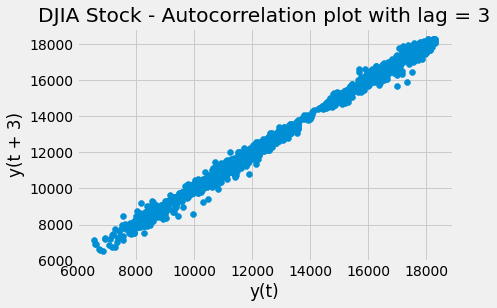

In [121]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('DJIA Stock - Autocorrelation plot with lag = 3')
plt.show()

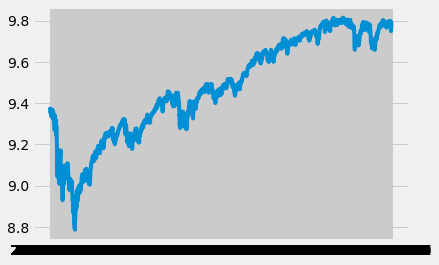

In [122]:
ts_log = np.log(df["Close"])
plt.plot(ts_log)

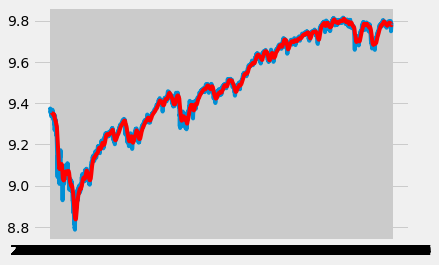

In [123]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')


In [124]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(20)

Date
2008-08-08         NaN
2008-08-11         NaN
2008-08-12         NaN
2008-08-13         NaN
2008-08-14         NaN
2008-08-15         NaN
2008-08-18         NaN
2008-08-19         NaN
2008-08-20         NaN
2008-08-21         NaN
2008-08-22         NaN
2008-08-25   -0.014626
2008-08-26   -0.009976
2008-08-27   -0.000150
2008-08-28    0.017652
2008-08-29    0.002849
2008-09-02    0.001217
2008-09-03    0.003515
2008-09-04   -0.024684
2008-09-05   -0.020821
Name: Close, dtype: float64

In [125]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).mean()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

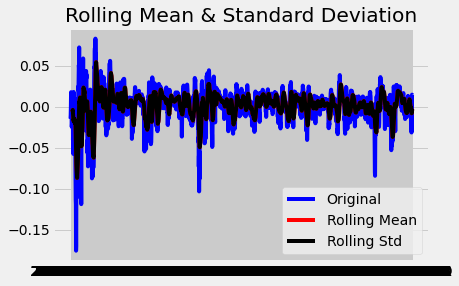

Results of Dickey-Fuller Test:
Test Statistic                -8.004468e+00
p-value                        2.287311e-12
#Lags Used                     2.100000e+01
Number of Observations Used    1.956000e+03
Critical Value (1%)           -3.433698e+00
Critical Value (5%)           -2.863019e+00
Critical Value (10%)          -2.567557e+00
dtype: float64


In [126]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)
#WE can say with 92% confidence this is a stationary series

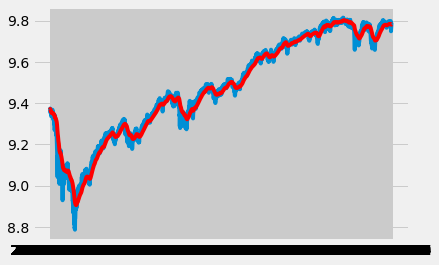

In [127]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

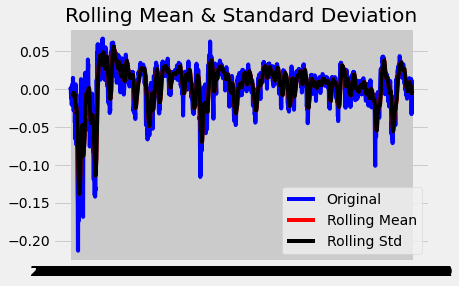

Results of Dickey-Fuller Test:
Test Statistic                -5.674327e+00
p-value                        8.775444e-07
#Lags Used                     2.100000e+01
Number of Observations Used    1.967000e+03
Critical Value (1%)           -3.433679e+00
Critical Value (5%)           -2.863010e+00
Critical Value (10%)          -2.567553e+00
dtype: float64


In [128]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

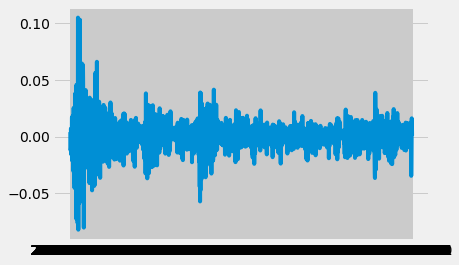

In [129]:
#Differencing 
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

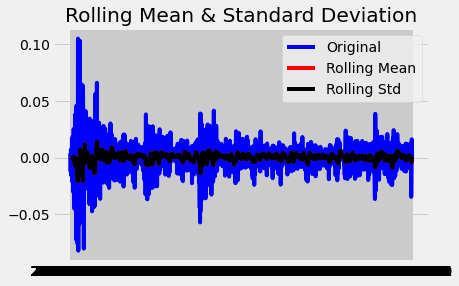

Results of Dickey-Fuller Test:
Test Statistic                -1.040151e+01
p-value                        1.904073e-18
#Lags Used                     2.000000e+01
Number of Observations Used    1.967000e+03
Critical Value (1%)           -3.433679e+00
Critical Value (5%)           -2.863010e+00
Critical Value (10%)          -2.567553e+00
dtype: float64


In [130]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [131]:
ts_log

Date
2008-08-08    9.370273
2008-08-11    9.374358
2008-08-12    9.362415
2008-08-13    9.352964
2008-08-14    9.360133
                ...   
2016-06-27    9.749184
2016-06-28    9.764784
2016-06-29    9.781019
2016-06-30    9.794230
2016-07-01    9.795310
Name: Close, Length: 1989, dtype: float64

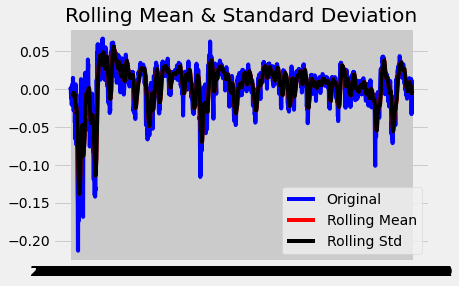

Results of Dickey-Fuller Test:
Test Statistic                -5.674327e+00
p-value                        8.775444e-07
#Lags Used                     2.100000e+01
Number of Observations Used    1.967000e+03
Critical Value (1%)           -3.433679e+00
Critical Value (5%)           -2.863010e+00
Critical Value (10%)          -2.567553e+00
dtype: float64


In [132]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

In [133]:
from statsmodels.tsa.stattools import acf, pacf

In [134]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Autocorrelation Function')

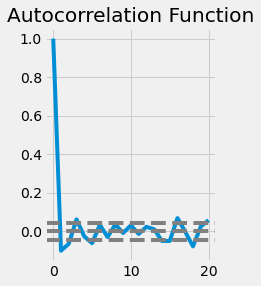

In [135]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

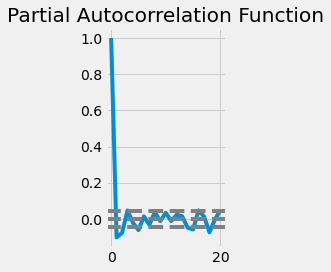

In [136]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [137]:
df


,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2008-08-08,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
2008-08-11,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2008-08-12,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
2008-08-13,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
2008-08-14,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
...,...,...,...,...,...,...,...
2016-06-27,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
2016-06-28,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2016-06-29,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688


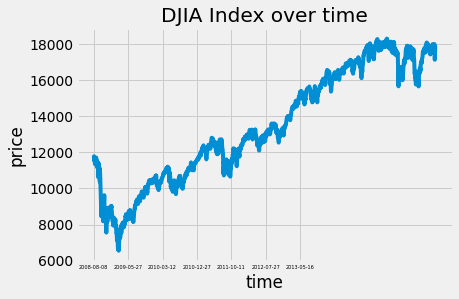

<Figure size 1440x216 with 0 Axes>

In [138]:
plt.plot( df["Close"]) #df["Date"],
plt.xticks(np.arange(0,1259, 200),df["Date"][0:1259:200])
plt.title("DJIA Index over time")
plt.xlabel("time")
plt.ylabel("price")
plt.tick_params(axis='x', which='major', labelsize=5)
plt.figure(figsize=(20,3))
#plt.tick_params(axis='y', which='major', labelsize=5)
#plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')#
plt.show()

In [139]:
'''train_data, test_data = df[0:int(len(df)*0.75)],df[int(len(df)*0.75):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))'''

"train_data, test_data = df[0:int(len(df)*0.75)],df[int(len(df)*0.75):]\ntraining_data = train_data['Close'].values\ntest_data = test_data['Close'].values\nhistory = [x for x in training_data]\nmodel_predictions = []\nN_test_observations = len(test_data)\nfor time_point in range(N_test_observations):\n    model = ARIMA(history, order=(1,1,1))\n    model_fit = model.fit(disp=0)\n    output = model_fit.forecast()\n    yhat = output[0]\n    model_predictions.append(yhat)\n    true_test_value = test_data[time_point]\n    history.append(true_test_value)\nMSE_error = mean_squared_error(test_data, model_predictions)\nprint('Testing Mean Squared Error is {}'.format(MSE_error))"

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'RSS: 0.3135')

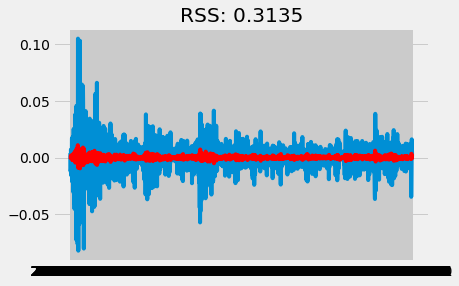

In [140]:
model2 = ARIMA(ts_log, order=(1, 1, 1))  
results_ARIMA = model2.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [141]:
#model2.save('arima_model.h5')
results_ARIMA.save('arima_model.pkl')

In [142]:
from statsmodels.tsa.arima_model import ARIMAResults

In [143]:
loaded = ARIMAResults.load('arima_model.pkl')

In [144]:
loaded.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 1988
Model:                 ARIMA(1, 1, 1)   Log Likelihood                5881.596
Method:                       css-mle   S.D. of innovations              0.013
Date:                Thu, 29 Apr 2021   AIC                         -11755.191
Time:                        03:41:26   BIC                         -11732.812
Sample:                             1   HQIC                        -11746.971
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0002      0.000      0.902      0.367      -0.000       0.001
ar.L1.D.Close     0.3051      0.170      1.793      0.073      -0.028       0.639
ma.L1.D.Close    -0.4166      0.162     -2.564      0.010      -0.735      -0.098
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.2774           +0.0000j            3.2774            0.0000
MA.1            2.4005           +0.0000j            2.4005            0.0000
-----------------------------------------------------------------------------
"""

In [145]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2008-08-11    0.000213
2008-08-12   -0.000196
2008-08-13    0.001386
2008-08-14    0.001777
2008-08-15    0.000090
dtype: float64


In [146]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2008-08-11    0.000213
2008-08-12    0.000017
2008-08-13    0.001403
2008-08-14    0.003180
2008-08-15    0.003269
dtype: float64


In [147]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2008-08-08    9.370273
2008-08-11    9.370486
2008-08-12    9.370290
2008-08-13    9.371676
2008-08-14    9.373453
dtype: float64

Text(0.5, 1.0, 'RMSE: 2321.9975')

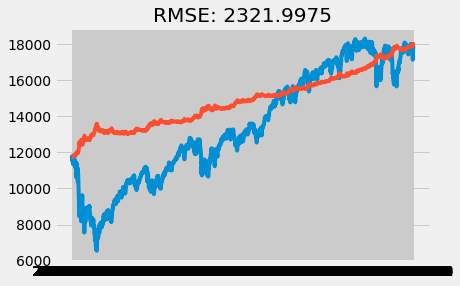

In [148]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df["Close"])
plt.plot(predictions_ARIMA)

#for i in df["close"]
rmse_ARIMA=np.sqrt(sum((predictions_ARIMA-df["Close"])**2)/len(df["Close"]))

plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df["Close"])**2)/len(df["Close"])))

In [151]:
predictions_ARIMA_store=predictions_ARIMA[int(len(predictions_ARIMA)*0.75):]
df_arima=df[int(len(predictions_ARIMA)*0.75):]

Text(0.5, 1.0, 'RMSE: 1041.3531')

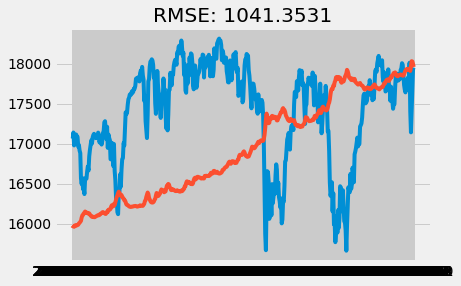

In [152]:
plt.plot(df_arima["Close"])
plt.plot(predictions_ARIMA_store)

#for i in df["close"]
rmse_ARIMA=np.sqrt(sum((predictions_ARIMA_store-df_arima["Close"])**2)/len(df_arima["Close"]))

plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_store-df_arima["Close"])**2)/len(df_arima["Close"])))

In [ ]:
predictions_ARIMA_store

Date
2014-07-14    15974.427486
2014-07-15    15966.587513
2014-07-16    15965.139685
2014-07-17    15958.836967
2014-07-18    15975.413925
                  ...     
2016-06-27    17971.090439
2016-06-28    18030.406548
2016-06-29    18026.480850
2016-06-30    17994.926494
2016-07-01    17958.002814
Length: 498, dtype: float64

#LSTM Part here

In [ ]:
#LSTM PArt

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df_lstm = pd.read_csv('upload_DJIA_table.csv')
reversed_df=df_lstm.iloc[::-1]
reversed_df

,Date,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
...,...,...,...,...,...,...,...
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234


In [ ]:
#The index has been replaced with the dates
reversed_df.index=reversed_df.Date
reversed_df

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2008-08-08,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
2008-08-11,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2008-08-12,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
2008-08-13,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
2008-08-14,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
...,...,...,...,...,...,...,...
2016-06-27,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
2016-06-28,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2016-06-29,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688


In [ ]:
reversed_df.shape

(1989, 7)

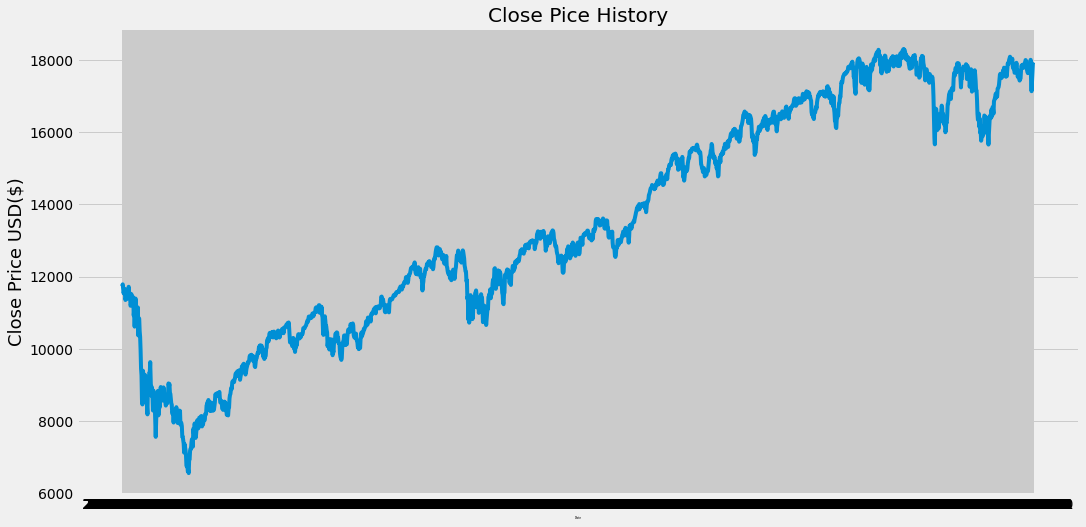

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Pice History')
plt.plot(reversed_df['Date'],reversed_df['Close'])
plt.xlabel('Date',fontsize=3)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [ ]:
data=reversed_df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*.75)

training_data_len

1492

In [ ]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.4408942 ],
       [0.44497647],
       [0.43308732],
       ...,
       [0.9474974 ],
       [0.96749772],
       [0.96914484]])

In [ ]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.4408942 , 0.44497647, 0.43308732, 0.42377949, 0.43083154,
       0.43456885, 0.41922626, 0.40810547, 0.41395995, 0.41504621,
       0.43186252, 0.41130982, 0.41357241, 0.42119137, 0.43926733,
       0.42471444, 0.42241616, 0.42377269, 0.39447907, 0.39726092,
       0.42189092, 0.39809137, 0.4013373 , 0.4153437 , 0.41434757,
       0.37146905, 0.38349673, 0.34530324, 0.38015394, 0.41149599,
       0.37981395, 0.36608545, 0.36362059, 0.3803553 , 0.39064572,
       0.32454652, 0.36578714, 0.36412209, 0.33452493, 0.32114072,
       0.28970263, 0.24649184, 0.2304268 , 0.17272263, 0.16184322,
       0.24143462, 0.23492226, 0.17261381, 0.20672669, 0.19592887,
       0.23104982, 0.21135047, 0.16762457, 0.18224718, 0.15570313,
       0.13843375, 0.21402443, 0.20772115, 0.22384737, 0.23611385])]
[0.23567360397129578]

[array([0.4408942 , 0.44497647, 0.43308732, 0.42377949, 0.43083154,
       0.43456885, 0.41922626, 0.40810547, 0.41395995, 0.41504621,
       0.43186252, 0.41130982, 0.41

In [ ]:
x_train, y_train= np.array(x_train), np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(1432, 60, 1)

In [ ]:
#model=Sequential()
#model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
#model.add(LSTM(50,return_sequences=False))
#model.add(Dense(25))
#model.add(Dense(1))


In [ ]:
#model.compile(optimizer='adam', loss='mean_squared_error')
#model.fit(x_train,y_train,batch_size=1,epochs=100)

In [ ]:
#model.summary()

In [ ]:
#model.save('lstm_model.h5')

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('lstm_model.h5')


# Show the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf


In [ ]:
test_data=scaled_data[training_data_len - 60: , :]
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i - 60:i, 0])
  

In [ ]:
x_test=np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [ ]:
rmse_LSTM=np.sqrt(np.mean(predictions-y_test)**2)
rmse_LSTM

9.409226840291751

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


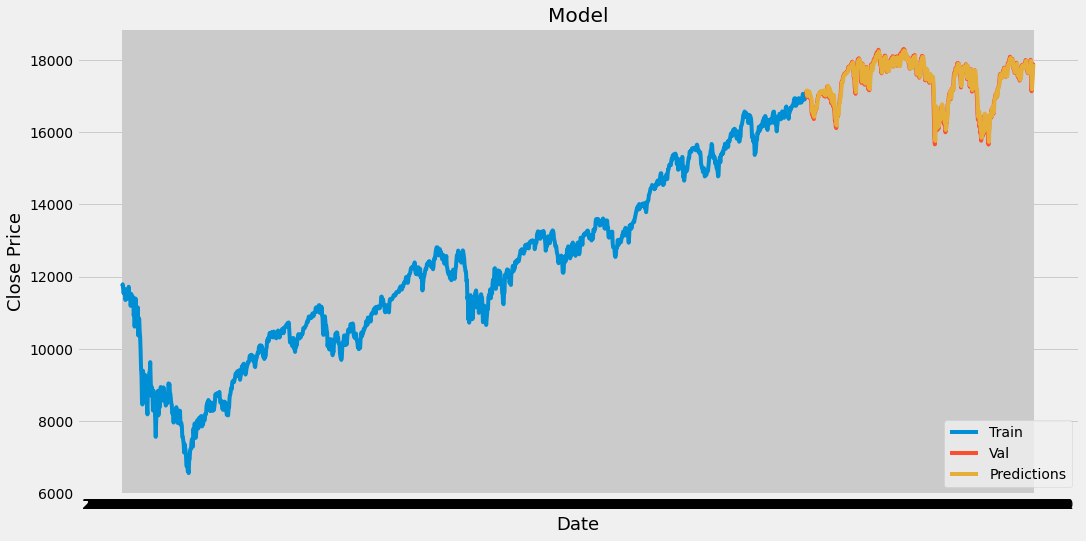

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
valid['Predictions']

Date
2014-07-15    17082.419922
2014-07-16    17086.181641
2014-07-17    17159.462891
2014-07-18    17007.908203
2014-07-21    17126.289062
                  ...     
2016-06-27    17430.078125
2016-06-28    17192.757812
2016-06-29    17435.390625
2016-06-30    17692.871094
2016-07-01    17902.445312
Name: Predictions, Length: 497, dtype: float32

In [ ]:
predictions_ARIMA_store

Date
2014-07-14    15974.427486
2014-07-15    15966.587513
2014-07-16    15965.139685
2014-07-17    15958.836967
2014-07-18    15975.413925
                  ...     
2016-06-27    17971.090439
2016-06-28    18030.406548
2016-06-29    18026.480850
2016-06-30    17994.926494
2016-07-01    17958.002814
Length: 498, dtype: float64

In [ ]:
rmse_ARIMA

2321.9975326423278

In [ ]:
rmse_LSTM

9.409226840291751

In [ ]:
ratio_lstm=rmse_ARIMA/(rmse_LSTM+rmse_ARIMA)
print(ratio_lstm)
ratio_ARIMA=rmse_LSTM/(rmse_LSTM+rmse_ARIMA)
print(ratio_ARIMA)

0.9959641419061597
0.004035858093840229


In [ ]:
final_lstm=[]

for i in valid['Predictions']:
  final_lstm.append(ratio_lstm*i)
print(len(final_lstm))

497


In [ ]:
final_arima=[] 

for i in predictions_ARIMA_store:
  final_arima.append(ratio_ARIMA*i)
final_arima.pop()
len(final_arima)

497

In [ ]:
final_predicted_values=[]

for i in range(len(final_arima)): 
  final_predicted_values.append(final_arima[i]+final_lstm[i])
final_predicted_values.reverse
#final_preds=final_predicted_values
#final_preds
final_predicted_values

[17077.948221635597,
 17081.6631176036,
 17154.64277164698,
 17003.67430048599,
 17121.644293760044,
 17075.486607069866,
 17134.075884272886,
 17108.411630413513,
 17106.422294791046,
 16991.356174016655,
 17012.976794858652,
 16946.256857985125,
 16916.367359206874,
 16616.37783551625,
 16550.09740508311,
 16622.349797937637,
 16487.57417421626,
 16499.41336069167,
 16426.612663665856,
 16603.979802918526,
 16617.071949687175,
 16606.637820838107,
 16693.594770164713,
 16751.84478908468,
 16703.22785529865,
 16870.921642736885,
 16945.72798914838,
 17001.269811981645,
 17058.310779162715,
 17023.103773182716,
 17095.91542448496,
 17123.892279797063,
 17138.71461241364,
 17099.645284334652,
 17118.379802840118,
 17089.680952423125,
 17100.238649714345,
 17092.075696016982,
 17155.629577276803,
 17131.007758443226,
 17040.651867764132,
 17093.12035709732,
 17074.285251296733,
 17016.901561393744,
 17058.148933762364,
 17151.98951181147,
 17174.319036181947,
 17276.36512965887,
 17289.0

In [ ]:
final_preds=final_predicted_values
final_preds

[17077.948221635597,
 17081.6631176036,
 17154.64277164698,
 17003.67430048599,
 17121.644293760044,
 17075.486607069866,
 17134.075884272886,
 17108.411630413513,
 17106.422294791046,
 16991.356174016655,
 17012.976794858652,
 16946.256857985125,
 16916.367359206874,
 16616.37783551625,
 16550.09740508311,
 16622.349797937637,
 16487.57417421626,
 16499.41336069167,
 16426.612663665856,
 16603.979802918526,
 16617.071949687175,
 16606.637820838107,
 16693.594770164713,
 16751.84478908468,
 16703.22785529865,
 16870.921642736885,
 16945.72798914838,
 17001.269811981645,
 17058.310779162715,
 17023.103773182716,
 17095.91542448496,
 17123.892279797063,
 17138.71461241364,
 17099.645284334652,
 17118.379802840118,
 17089.680952423125,
 17100.238649714345,
 17092.075696016982,
 17155.629577276803,
 17131.007758443226,
 17040.651867764132,
 17093.12035709732,
 17074.285251296733,
 17016.901561393744,
 17058.148933762364,
 17151.98951181147,
 17174.319036181947,
 17276.36512965887,
 17289.0

In [ ]:
#df2=df["Date"]
df2=df.iloc[::-1]
df2

,Date,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
...,...,...,...,...,...,...,...
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234


In [ ]:
df3=df2[int(len(df2)*0.75):]
#df2=df2.set_index('Date')
df3

,Date,Open,High,Low,Close,Volume,Adj Close
497,2014-07-14,16950.929688,17088.429688,16950.929688,17055.419922,60570000,17055.419922
496,2014-07-15,17055.029297,17120.339844,17006.390625,17060.679688,101730000,17060.679688
495,2014-07-16,17061.910156,17139.349609,17061.910156,17138.199219,111500000,17138.199219
494,2014-07-17,17133.449219,17151.560547,16966.189453,16976.810547,99240000,16976.810547
493,2014-07-18,16978.160156,17113.509766,16977.519531,17100.179688,112530000,17100.179688
...,...,...,...,...,...,...,...
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234


In [ ]:
#df3.
df3.drop(df3.tail(1).index,inplace=True)
df3


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Date,Open,High,Low,Close,Volume,Adj Close
497,2014-07-14,16950.929688,17088.429688,16950.929688,17055.419922,60570000,17055.419922
496,2014-07-15,17055.029297,17120.339844,17006.390625,17060.679688,101730000,17060.679688
495,2014-07-16,17061.910156,17139.349609,17061.910156,17138.199219,111500000,17138.199219
494,2014-07-17,17133.449219,17151.560547,16966.189453,16976.810547,99240000,16976.810547
493,2014-07-18,16978.160156,17113.509766,16977.519531,17100.179688,112530000,17100.179688
...,...,...,...,...,...,...,...
5,2016-06-24,17946.630859,17946.630859,17356.339844,17400.750000,239000000,17400.750000
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688


In [107]:
final_predicted_values = pd.DataFrame(final_preds) 
final_predicted_values=final_predicted_values.set_index(df3["Date"])
final_predicted_values["Close"]=final_predicted_values
#final_predicted_values["Date"]=list(df3["Date"])
#final_predicted_values.rename(columns={"0": "Close"})
#final_predicted_values=final_predicted_values.drop([' '],axis=1)
final_predicted_values

,0,Close
Date,,
2014-07-14,17077.948222,17077.948222
2014-07-15,17081.663118,17081.663118
2014-07-16,17154.642772,17154.642772
2014-07-17,17003.674300,17003.674300
2014-07-18,17121.644294,17121.644294
...,...,...
2016-06-24,17432.006805,17432.006805
2016-06-27,17195.899053,17195.899053
2016-06-28,17437.792025,17437.792025


In [108]:
list(final_predicted_values.columns)

[0, 'Close']

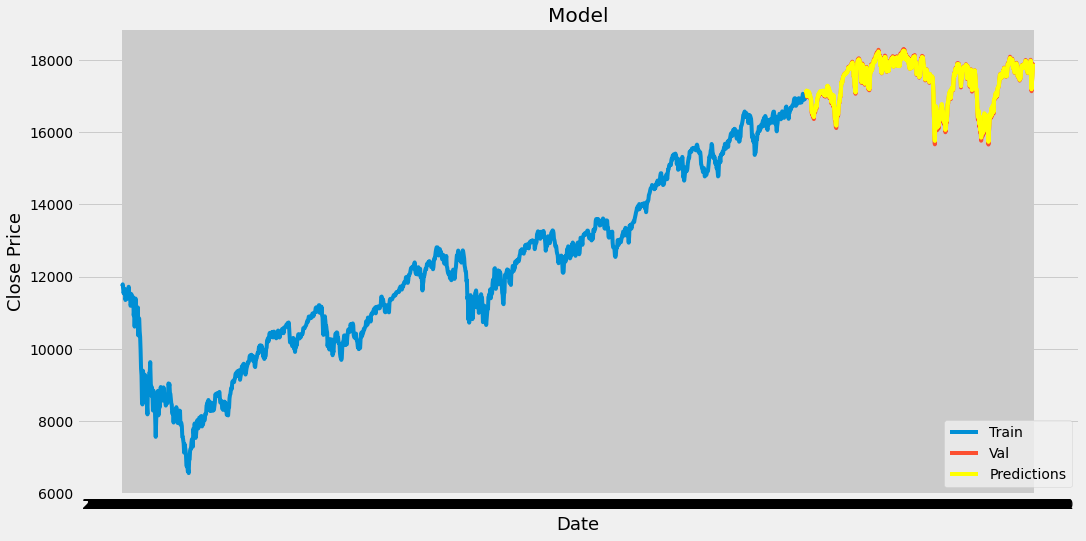

In [113]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)

#ax2 = plt.subplot(212)
#true_targets = plt.plot([:, 0, :])
#guessed_targets = plt.plot(final_predicted_values[:, 0, :], linestyle='--')
#xmin=

plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot((final_predicted_values),'yellow')
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

**Sentiment Analysis**

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
import numpy as np
import pandas as pd
df_stock=pd.read_csv('upload_DJIA_table.csv')
df= pd.read_csv('Combined_News_DJIA.csv')
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who k

In [ ]:
df['scores']=df['Top1'].apply(lambda review: sid.polarity_scores(review))
df['compound']=df['scores'].apply(lambda score_dict:score_dict['compound'])
df['comp_score']=df['compound'].apply(lambda c:'pos' if c>=0 else 'neg')
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,scores,compound,comp_score
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""","{'neg': 0.262, 'neu': 0.738, 'pos': 0.0, 'comp...",-0.5994,neg
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...","{'neg': 0.0, 'neu': 0.668, 'pos': 0.332, 'comp...",0.8156,pos
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by m

In [ ]:
#df_stock["Date"]=df_stock["Date"][ ::-1]
df_stock=df_stock.iloc[::-1]
df_stock

,Date,Open,High,Low,Close,Volume,Adj Close
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
...,...,...,...,...,...,...,...
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234


In [ ]:

df_stock_new=pd.DataFrame({"Date":final_predicted_values["Date"],'Close':final_predicted_values["Close"]})
df_stock_new["Close"]=df_stock_new["Close"].rolling(5,min_periods=1).mean()
#df_stock_new = df_stock_new.iloc[4:]
#df_stock_new.drop(df.tail(1).index,inplace=True)#dropping last row to match final_predictions dimensions
df_stock_new


,Date,Close
Date,,
2014-07-14,2014-07-14,17077.948222
2014-07-15,2014-07-15,17079.805670
2014-07-16,2014-07-16,17104.751370
2014-07-17,2014-07-17,17079.482103
2014-07-18,2014-07-18,17087.914541
...,...,...
2016-06-24,2016-06-24,17761.987084
2016-06-27,2016-06-27,17641.732047
2016-06-28,2016-06-28,17565.509341


In [ ]:
#Standard Deviation
df_stock_new["std"]=df_stock_new["Close"].rolling(5,min_periods=1).std()
df_stock_new['std']=df_stock_new['std'].fillna(method="bfill")
df_stock_new

,Date,Close,std
Date,,,
2014-07-14,2014-07-14,17077.948222,1.313414
2014-07-15,2014-07-15,17079.805670,1.313414
2014-07-16,2014-07-16,17104.751370,14.967447
2014-07-17,2014-07-17,17079.482103,12.861895
2014-07-18,2014-07-18,17087.914541,11.191082
...,...,...,...
2016-06-24,2016-06-24,17761.987084,37.733225
2016-06-27,2016-06-27,17641.732047,62.589625
2016-06-28,2016-06-28,17565.509341,101.392731


In [ ]:
df_new=pd.DataFrame({"date":df["Date"].tail(502),'compound':df["compound"].tail(502)})
#new_compound=np.array(df_new['compound'].tail(502))
#replace 497 with len(predicted_final_values)
df_new = df_new.iloc[4:]
df_new.drop(df_new.tail(1).index,inplace=True)#dropping last row to match
df_new

,date,compound
1491,2014-07-14,-0.2023
1492,2014-07-15,-0.3182
1493,2014-07-16,0.1877
1494,2014-07-17,0.4767
1495,2014-07-18,0.0000
...,...,...
1983,2016-06-24,-0.3400
1984,2016-06-27,-0.2263
1985,2016-06-28,0.8316
1986,2016-06-29,0.0000


In [ ]:
combined_mu=np.array(df_new["compound"])*np.array(df_stock_new["std"])
#len(combined_mu)
combined_mu=list(combined_mu)
combined_mu



[-0.26570366538784673,
 -0.4179283555433159,
 2.809389859494137,
 6.131265534906454,
 0.0,
 -6.146212531065306,
 -2.236061185557741,
 0.0,
 -7.333390892165502,
 2.1056978171439034,
 0.0,
 5.016016974860899,
 0.0,
 -56.819755643065,
 -29.4712472621853,
 0.0,
 61.220882883207274,
 33.719918432940545,
 0.0,
 0.0,
 17.978720884023964,
 0.0,
 0.0,
 -17.08816815435137,
 16.00874285110682,
 25.006800059590823,
 -61.76357849923335,
 -28.31795518815691,
 -44.443776137662674,
 -38.16283738975472,
 77.55177652888312,
 -49.70143799399086,
 0.0,
 0.0,
 0.0,
 -19.290617197916603,
 -6.486403954660018,
 -0.8726153027599108,
 4.294409092722048,
 -1.698059137571816,
 2.3536996498949705,
 -3.822477947603399,
 3.539145572930841,
 -5.0863855921933006,
 -15.023992425565435,
 4.803791186312647,
 0.0,
 13.32170382437922,
 0.0,
 17.562611923883342,
 -37.4156027935794,
 24.661470536674607,
 -15.397042522808183,
 38.90825436201235,
 -20.86924995641846,
 -21.93306714743742,
 -15.090803239022271,
 0.0,
 0.0,
 -49.

In [ ]:
final_pred=[]
for i in range(len(combined_mu)):
   final_pred.append(final_preds[i]+ combined_mu[i])
final_pred    

[17077.68251797021,
 17081.245189248057,
 17157.452161506473,
 17009.805566020896,
 17121.644293760044,
 17069.3403945388,
 17131.839823087328,
 17108.411630413513,
 17099.08890389888,
 16993.4618718338,
 17012.976794858652,
 16951.272874959985,
 16916.367359206874,
 16559.558079873186,
 16520.626157820923,
 16622.349797937637,
 16548.79505709947,
 16533.13327912461,
 16426.612663665856,
 16603.979802918526,
 16635.0506705712,
 16606.637820838107,
 16693.594770164713,
 16734.75662093033,
 16719.236598149757,
 16895.928442796474,
 16883.964410649147,
 16972.951856793487,
 17013.867003025054,
 16984.94093579296,
 17173.467201013842,
 17074.190841803073,
 17138.71461241364,
 17099.645284334652,
 17118.379802840118,
 17070.39033522521,
 17093.752245759686,
 17091.203080714222,
 17159.923986369526,
 17129.309699305653,
 17043.005567414028,
 17089.297879149715,
 17077.824396869662,
 17011.815175801552,
 17043.1249413368,
 17156.793302997783,
 17174.319036181947,
 17289.686833483247,
 17289.0

In [ ]:
final_predicted_df = pd.DataFrame(final_pred) 
final_predicted_df=final_predicted_df.set_index(df3["Date"])
final_predicted_df

,0
Date,
2014-07-14,17077.682518
2014-07-15,17081.245189
2014-07-16,17157.452162
2014-07-17,17009.805566
2014-07-18,17121.644294
...,...
2016-06-24,17419.177509
2016-06-27,17181.735020
2016-06-28,17522.110220


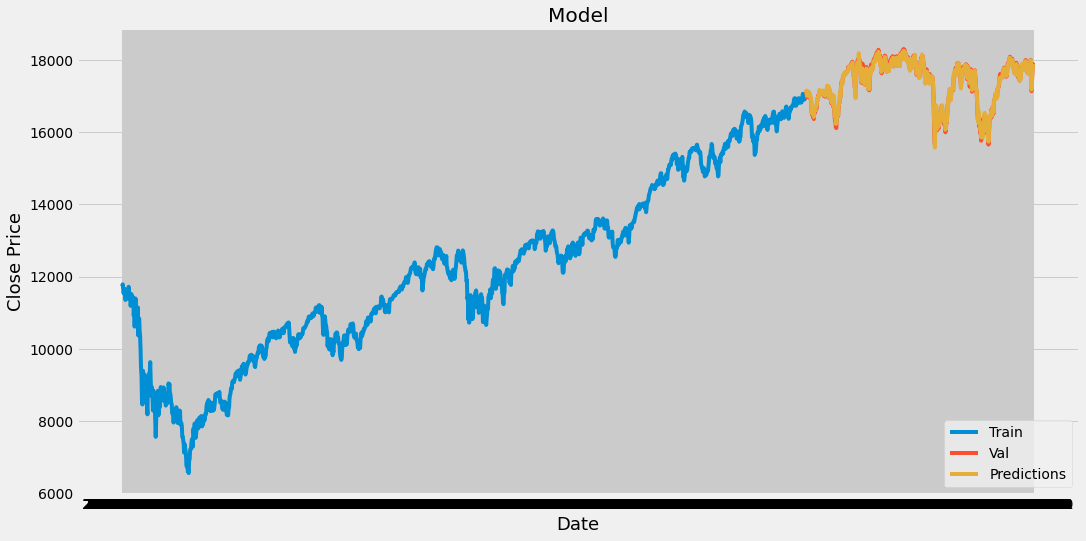

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)

#ax2 = plt.subplot(212)
#true_targets = plt.plot([:, 0, :])
#guessed_targets = plt.plot(final_predicted_values[:, 0, :], linestyle='--')
#xmin=

plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot((final_predicted_df))
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()